In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import pickle
import  sklearn.metrics as metrics

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
print(pickle.format_version)

4.0


# 데이터

In [4]:
X_samples = pickle.load(open('./datasets/X_samples.pickle', 'rb')) 
X_test = pickle.load(open('./datasets/X_test.pickle', 'rb'))
y_samples = pickle.load(open('./datasets/y_samples.pickle', 'rb'))
y_test = pickle.load(open('./datasets/y_test.pickle', 'rb'))

In [5]:
# pd.__version__

'1.1.5'

In [6]:
# pip install pandas==1.1.5

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# samples는 dict,그 dict의 value는 df 
# type(X_samples)
# X_samples['Raw']
print(X_samples.get('Raw'))
print('X_samples key : ' , X_samples.keys()) 
print('y_samples key : ' , y_samples.keys())

In [8]:
data_list = ['Raw', 'SMOTE', 'ADASYN', 'CNN', 'SMOTE + ENN', 'ADASYN + ENN']
cols = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC_AUC']

# KNN

각 분류 모델의 성능을 평가(model selection) 방법
1. Accuracy
2. Confusion matrix
3. Precision, Recall and F-measure(f1score, f-beta-score) 
4. Receiver operating characteristic (AUC-ROC)

In [9]:
%%time

clf =  KNeighborsClassifier(n_neighbors=5)

data_dict = {}
for i in data_list:
    print(i)
    clf.fit(X_samples.get(i), y_samples.get(i))
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)

    acc = accuracy_score(y_pred, y_test)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba[:, 1])

    data_dict[i] = [acc, precision, recall, f1, roc_auc]

df_knn = pd.DataFrame(data_dict, index = cols)
print(df_knn)



Raw
SMOTE
ADASYN
CNN
SMOTE + ENN
ADASYN + ENN
                Raw     SMOTE    ADASYN       CNN  SMOTE + ENN  ADASYN + ENN
Accuracy   0.999491  0.998016  0.998016  0.998683     0.997683      0.997683
Precision  0.911392  0.445087  0.445087  0.571429     0.402062      0.402062
Recall     0.765957  0.819149  0.819149  0.808511     0.829787      0.829787
F1-Score   0.832370  0.576779  0.576779  0.669604     0.541667      0.541667
ROC_AUC    0.909450  0.919699  0.919706  0.928314     0.919492      0.919492
Wall time: 1h 3min 10s


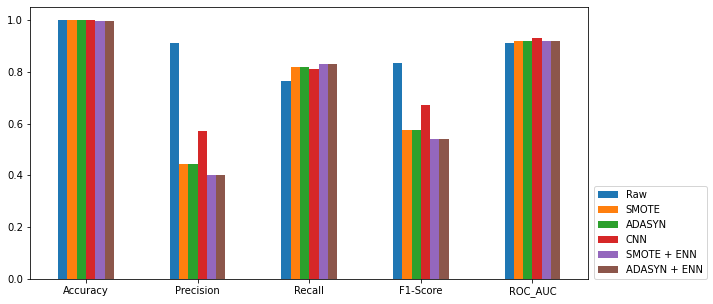

In [11]:
df_knn.plot(kind = 'bar', figsize = (10, 5))
plt.legend(loc=(1.01, 0.))
plt.xticks(rotation = 0)
plt.show()
